### **SOCCER PLAYERS BY RACE (BY COUNTRY OF ORIGIN OR NATIONALITY CLASSIFICATION)** <a id="1"></a>

<a><img style="float: right;" src="https://www.linkpicture.com/q/nigel-msipa-t5ny_JdGxJc-unsplash.jpg" width="300" /></a>
 



- Dataset source: https://www.kaggle.com/datasets/antoinekrajnc/soccer-players-statistics

### Notebook Preparation <a id="1.2"></a>

This part of the notebook deals with the relevant library import and visual configuration.

In [41]:
# Import libraries

import pandas as pd
import numpy as np 
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_samples, silhouette_score

In [42]:
# Set notebook options

pd.options.display.max_columns = 30

import warnings
warnings.filterwarnings("ignore")

## **2. Data Preparation** <a id="2"></a>

The below section provides an initial exploration of the data.

In [43]:
# Import the data as a DataFrame and check first 5 rows

df = pd.read_csv('soccer.csv', index_col=0)

df.head(5)

,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185 cm,80 kg,Right,02/05/1985,32,LW/ST,...,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11
Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170 cm,72 kg,Left,06/24/1987,29,RW,...,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8
Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174 cm,68 kg,Right,02/05/1992,25,LW,...,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11
Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182 cm,85 kg,Right,01/24/1987,30,ST,...,86,69,77,87,94,86,86,84,85,88,33,27,31,25,37
Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193 cm,92 kg,Right,03/27/1986,31,GK,...,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89


In [44]:
# Let us count the number of records in the dataset.

df.shape

(17588, 52)

- There are 17,588 rows and 52 columns in the dataset.

In [45]:
# Check data types and if any records are missing

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17588 entries, Cristiano Ronaldo to Barry Richardson
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nationality         17588 non-null  object 
 1   National_Position   1075 non-null   object 
 2   National_Kit        1075 non-null   float64
 3   Club                17588 non-null  object 
 4   Club_Position       17587 non-null  object 
 5   Club_Kit            17587 non-null  float64
 6   Club_Joining        17587 non-null  object 
 7   Contract_Expiry     17587 non-null  float64
 8   Rating              17588 non-null  int64  
 9   Height              17588 non-null  object 
 10  Weight              17588 non-null  object 
 11  Preffered_Foot      17588 non-null  object 
 12  Birth_Date          17588 non-null  object 
 13  Age                 17588 non-null  int64  
 14  Preffered_Position  17588 non-null  object 
 15  Work_Rate           17588 non-n

- Seems we have missing records in our datasets.
- Let us count the number of missing records in each column.

In [46]:
# Let us count the number of missing records in each column of our dataset.

df.isnull().sum()

Nationality               0
National_Position     16513
National_Kit          16513
Club                      0
Club_Position             1
Club_Kit                  1
Club_Joining              1
Contract_Expiry           1
Rating                    0
Height                    0
Weight                    0
Preffered_Foot            0
Birth_Date                0
Age                       0
Preffered_Position        0
Work_Rate                 0
Weak_foot                 0
Skill_Moves               0
Ball_Control              0
Dribbling                 0
Marking                   0
Sliding_Tackle            0
Standing_Tackle           0
Aggression                0
Reactions                 0
Attacking_Position        0
Interceptions             0
Vision                    0
Composure                 0
Crossing                  0
Short_Pass                0
Long_Pass                 0
Acceleration              0
Speed                     0
Stamina                   0
Strength            

- Obviously, we have some missing records in 6 columns of our dataset. However, we are only interested in the country of origin or Nationality column. Fortunately, no missing 'Nationality' record in the dataset. We can proceed with our analysis.

In [47]:
# Let us view the statistical information of our the Soccer players dataset.

df.describe()

,National_Kit,Club_Kit,Contract_Expiry,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
count,1075.000000,17587.000000,17587.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,...,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000
mean,12.219535,21.294536,2018.899414,66.166193,25.460314,2.934103,2.303161,57.972766,54.802877,44.230327,45.565499,47.441096,55.920173,61.770582,49.592051,...,63.206732,64.918524,52.393109,55.581192,45.157607,47.403173,47.181146,43.383443,49.165738,43.275586,16.609620,16.823061,16.458324,16.559814,16.901183
std,6.933187,19.163741,1.698787,7.083012,4.680217,0.655927,0.746156,16.834779,18.913857,21.561703,21.515179,21.827815,17.445464,9.275210,19.407087,...,14.618163,11.430807,17.473703,17.600155,19.374428,19.211887,18.464396,17.701903,15.871735,17.710839,17.139904,17.798052,16.600741,16.967256,18.034485
min,1.000000,1.000000,2017.000000,45.000000,17.000000,1.000000,1.000000,5.000000,4.000000,3.000000,5.000000,3.000000,2.000000,29.000000,2.000000,...,11.000000,15.000000,4.000000,3.000000,2.000000,4.000000,6.000000,4.000000,7.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,9.000000,2017.000000,62.000000,22.000000,3.000000,2.000000,53.000000,47.000000,22.000000,23.000000,26.000000,44.000000,55.000000,37.000000,...,55.000000,58.000000,45.000000,45.000000,29.000000,32.000000,34.000000,31.000000,39.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,12.000000,18.000000,2019.000000,66.000000,25.000000,3.000000,2.000000,63.000000,60.000000,48.000000,51.000000,54.000000,59.000000,62.000000,54.000000,...,65.000000,65.000000,56.000000,59.000000,48.000000,52.000000,48.000000,42.000000,50.000000,44.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,18.000000,27.000000,2020.000000,71.000000,29.000000,3.000000,3.000000,69.000000,68.000000,64.000000,64.000000,66.000000,70.000000,68.000000,64.000000,...,74.000000,73.000000,65.000000,69.000000,61.000000,63.000000,62.000000,57.000000,61.000000,57.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,36.000000,99.000000,2023.000000,94.000000,47.000000,5.000000,5.000000,95.000000,97.000000,92.000000,95.000000,92.000000,96.000000,96.000000,94.000000,...,96.000000,95.000000,94.000000,93.000000,95.000000,91.000000,92.000000,93.000000,96.000000,93.000000,91.000000,89.000000,95.000000,91.000000,90.000000


- From the statistical information presented above from the dataset;
- Maximum age of soccer player is 47 years.
- Minimum age of soccer player is 17 years.
- Mean age of soccer players in our dataset is 25.46 year (roughly 25 years).

## Nationality Exploration <a id="3"></a>

In [48]:
# import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [49]:
# Let us count the number of players within each nationality.

df['Nationality'].value_counts(ascending=True)

San Marino       1
Aruba            1
Guam             1
Eritrea          1
Mauritius        1
              ... 
Brazil         921
France         974
Spain         1008
Argentina     1097
England       1618
Name: Nationality, Length: 160, dtype: int64

- Let us count the number of unique nationalities in the dataset.

In [50]:
# Group by Nationality and count the number of 'Nationality'. 

df.groupby(['Nationality']).count()

,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
Nationality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Albania,0,0,37,37,37,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
Algeria,0,0,50,50,50,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
Angola,0,0,11,11,11,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Antigua & Barbuda,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Venezuela,22,22,42,42,42,42,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
Wales,23,23,122,122,122,122,122,122,122,122,122,122,122,122,122,...,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122


- There are 160 unique nationalities in our dataset. For the purpose of simplicity and clarity, Let us group these nationalities into 20 groups

- Group 1 = United States of America.
- Group 2 = England.
- Group 3 = Italy. 
- Group 4 = Germany.
- Group 5 = France.
- Group 6 = Canada.
- Group 7 = Netherlands.
- Group 8 = Japan.
- Group 9 = Brazil.
- Group 10 = Russia.
- Group 11 = Australia
- Group 12 = Spain
- Group 13 = Argentina
- Group 14 = Portugal
- Group 15 = Poland
- Group 16 = Colombia
- Group 17 = Denmark
- Group 18 = Chile
- Group 19 = Nigeria
- Group 20 = Rest of the World

In [51]:
 # Counting number of soccer players whose nationalities = United States of America 

usa = (df['Nationality']=='United States').sum()
usa

332

In [52]:
 # Counting number of soccer players whose nationalities = England 

england = (df['Nationality']=='England').sum()
england

1618

In [53]:
 # Counting number of soccer players whose nationalities = Italy

italy = (df['Nationality']=='Italy').sum()
italy

751

In [54]:
 # Counting number of soccer players whose nationalities = Germany
germany = (df['Nationality']=='Germany').sum()
germany

689

In [55]:
 # Counting number of soccer players whose nationalities = France

france = (df['Nationality']=='France').sum()
france

974

In [56]:
 # Counting number of soccer players whose nationalities = Canada

canada = (df['Nationality']=='Canada').sum()
canada

59

In [57]:
 # Counting number of soccer players whose nationalities = Netherlands

netherlands = (df['Nationality']=='Netherlands').sum()
netherlands

426

In [58]:
 # Counting number of soccer players whose nationalities = Japan

japan = (df['Nationality']=='Japan').sum()
japan

471

In [59]:
 # Counting number of soccer players whose nationalities = Brazil

brazil = (df['Nationality']=='Brazil').sum()
brazil

921

In [60]:
 # Counting number of soccer players whose nationalities = Russia

russia = (df['Nationality']=='Russia').sum()
russia

309

In [61]:
 # Counting number of soccer players whose nationalities = Australia

australia = (df['Nationality']=='Australia').sum()
australia

234

In [62]:
 # Counting number of soccer players whose nationalities = Spain

spain = (df['Nationality']=='Spain').sum()
spain

1008

In [63]:
 # Counting number of soccer players whose nationalities = Argentina

argentina = (df['Nationality']=='Argentina').sum()
argentina

1097

In [64]:
 # Counting number of soccer players whose nationalities = Portugal

portugal = (df['Nationality']=='Portugal').sum()
portugal

360

In [65]:
 # Counting number of soccer players whose nationalities = Poland

poland = (df['Nationality']=='Poland').sum()
poland

328

In [66]:
 # Counting number of soccer players whose nationalities = Colombia

colombia = (df['Nationality']=='Colombia').sum()
colombia

592

In [67]:
 # Counting number of soccer players whose nationalities = Denmark

denmark = (df['Nationality']=='Denmark').sum()
denmark

342

In [68]:
 # Counting number of soccer players whose nationalities = Chile

chile = (df['Nationality']=='Chile').sum()
chile

398

In [69]:
 # Counting number of soccer players whose nationalities = Nigeria

nigeria = (df['Nationality']=='Nigeria').sum()
nigeria

122

In [70]:
  # Counting number of soccer players from the rest of the world

rest_of_the_world = len(df['Nationality']) - usa - england - italy - germany - france - canada - netherlands - japan - brazil - russia - australia - spain - argentina - portugal - poland - colombia - denmark - chile - nigeria
rest_of_the_world

6557

In [71]:
# Create DataFrame based on the nationality groupings created above
dataframe = pd.DataFrame()

# Add columns
dataframe['nationality'] = ['USA', 'England', 'Italy', 'Germany', 'France', 'Canada', 'Netherlands', 'Japan', 'Brazil', 'Russia', 'Australia', 'Spain', 'Argentina', 'Portugal', 'Poland', 'Colombia', 'Denmark', 'Chile', 'Nigeria', 'Rest of World']
dataframe['Number of Soccer Players'] = [usa, england, italy, germany, france, canada, netherlands, japan, brazil, russia, australia, spain, argentina, portugal, poland, colombia, denmark, chile, nigeria, rest_of_the_world]

# Show DataFrame
dataframe

,nationality,Number of Soccer Players
0,USA,332
1,England,1618
2,Italy,751
3,Germany,689
4,France,974
5,Canada,59
6,Netherlands,426
7,Japan,471
8,Brazil,921
9,Russia,309


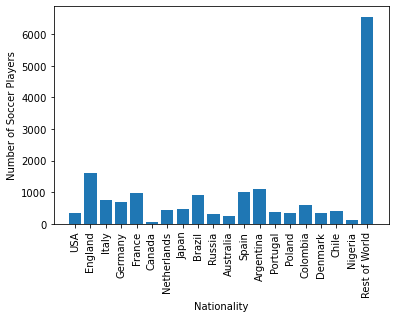

In [72]:
# Let us visualize the bar chart of players for each nationality.

x = dataframe["nationality"]
y = dataframe["Number of Soccer Players"]
plt.bar(x,y,align='center') # A bar chart
plt.xticks(rotation = 90)
plt.xlabel('Nationality')
plt.ylabel('Number of Soccer Players')
plt.show()

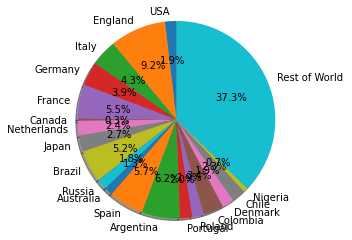

<Figure size 1440x1080 with 0 Axes>

In [73]:
# Let us plot pie chart
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = x = dataframe["nationality"]
data = dataframe["Number of Soccer Players"]


fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
fig = plt.figure(figsize =(20, 15))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

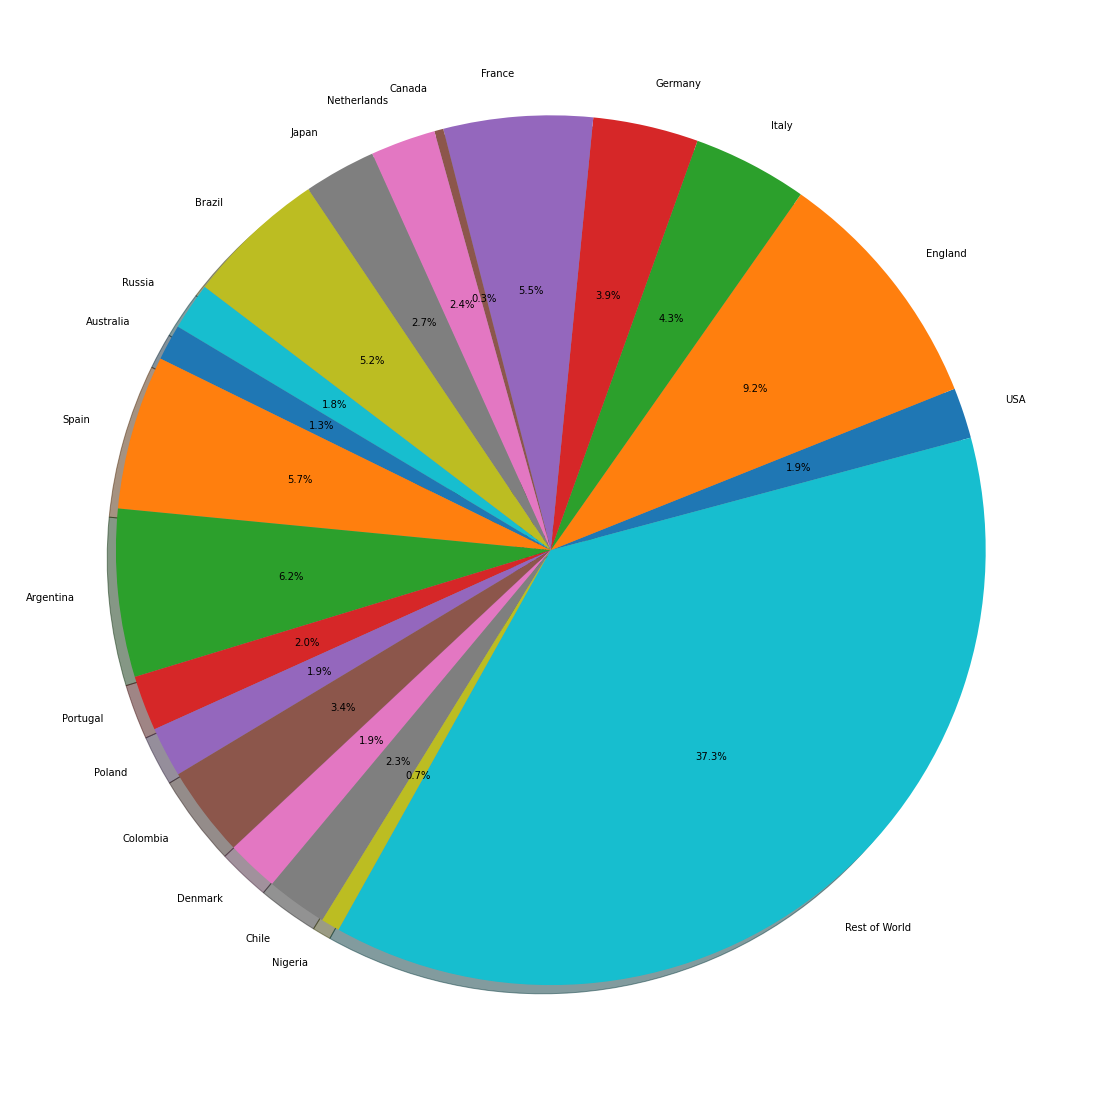

In [74]:
# Import libraries
# Let us plot a bigger view of pie chart for proper visibility

from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset
countries = x = dataframe["nationality"]
 
data = dataframe["Number of Soccer Players"]
 
# Creating plot
fig = plt.figure(figsize =(60, 20))
plt.pie(data, labels = countries, autopct='%1.1f%%', startangle=15, shadow=True)
 
# show plot
plt.show()

## **5. Conclusion** <a id="5"></a>


### With a total of 17588 Soccer players in our dataset, the following table shows the number of Soccer players based on their various nationalities.

- Soccer players from United States of America represent 1.9% of the dataset
- Soccer players from England represent 9.2% of the dataset
- Soccer players from Italy represent 4.3% of the dataset
- Soccer players from Germany represent 3.9% of the dataset
- Soccer players from France represent 5.5% of the dataset
- Soccer players from Canada represent 0.3% of the dataset
- Soccer players from Netherlands represent 2.4% of the dataset
- Soccer players from Japan represent 2.7% of the dataset
- Soccer players from Brazil represent 5.2% of the dataset
- Soccer players from Russia represent 1.8% of the dataset
- Soccer players from Australia represent 1.3% of the dataset
- Soccer players from Spain represent 5.7% of the dataset
- Soccer players from Argentina represent 6.2% of the dataset
- Soccer players from Portugal represent 2.0% of the dataset
- Soccer players from Poland represent 1.9% of the dataset
- Soccer players from Colombia represent 3.4% of the dataset
- Soccer players from Denmark represent 1.9% of the dataset
- Soccer players from Chile represent 2.3% of the dataset
- Soccer players from Nigeria represent 0.7% of the dataset
- Soccer players from Rest of the World represent 37.3% of the dataset